In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.metrics import Precision, Recall, MeanSquaredError, F1Score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from datetime import datetime

# Load Data

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/ML Perceptron/BA_AirlineReviews_CL_excel.xlsx')

data

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3696,Very Dissatisfied,British Airways customer review,J Robertson,29th August 2012,False,This was a bmi Regional operated flight on a R...,NaN,Economy Class,NaN,NaT,3.0,1.0,NaN,3.0,no,NaN,2.0,NaN,NaN
3697,3697,Advocate,British Airways customer review,Nick Berry,28th August 2012,False,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaT,4.0,5.0,NaN,3.0,yes,NaN,4.0,NaN,NaN
3698,3698,Very Satisfied,British Airways customer review,Avril Barclay,12th October 2011,False,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaT,NaN,NaN,NaN,4.0,yes,NaN,NaN,NaN,NaN
3699,3699,Satisfied,British Airways customer review,C Volz,11th October 2011,False,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaT,1.0,3.0,NaN,1.0,no,NaN,5.0,NaN,NaN


# Pre Processing Data

Cek Tipe Data

In [ ]:
data.dtypes

id                                int64
Satisfaction                     object
ReviewHeader                     object
Name                             object
Datetime                         object
VerifiedReview                     bool
ReviewBody                       object
TypeOfTraveller                  object
SeatType                         object
Route                            object
DateFlown                datetime64[ns]
SeatComfort                     float64
CabinStaffService               float64
GroundService                   float64
ValueForMoney                   float64
Recommended                      object
Aircraft                         object
Food&Beverages                  float64
InflightEntertainment           float64
Wifi&Connectivity               float64
dtype: object

In [ ]:
data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

Mengisi Missing Value Data Numerik

In [ ]:
numeric_tr = data.select_dtypes(include=np.number)
numeric_columns_tr = numeric_tr.columns
data[numeric_columns_tr] = data[numeric_columns_tr].fillna(data.mean())

<ipython-input-12-7d3ef80b7b16>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data[numeric_columns_tr] = data[numeric_columns_tr].fillna(data.mean())
<ipython-input-12-7d3ef80b7b16>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[numeric_columns_tr] = data[numeric_columns_tr].fillna(data.mean())


Mengisi Missing Value Data Kategorikal

In [ ]:
object_columns_tr = data.select_dtypes(include='object').columns.tolist()
object_columns_tr.remove('Satisfaction')
data = data.fillna(data.mode().iloc[0])
data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

**Handling Outlier**

1. Kolom SeatComfort

SeatComfort Shape: (3701, 20)


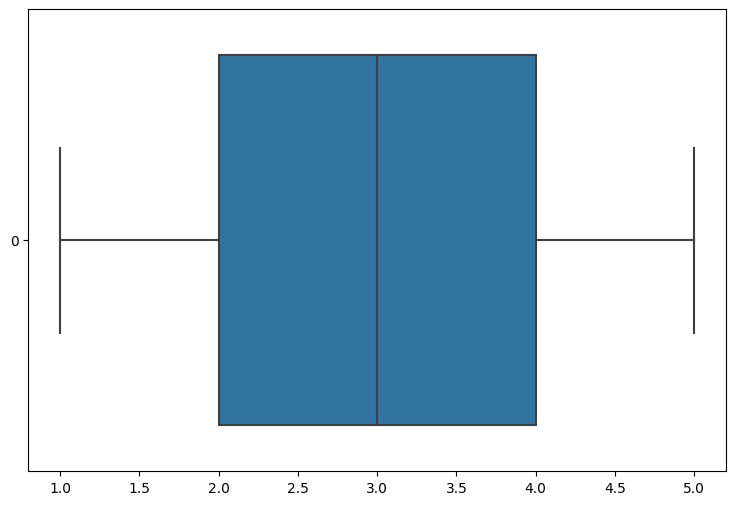

2.0


In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print("SeatComfort Shape:",data.shape)

max_val = data.SeatComfort.quantile(0.75)
min_val = data.SeatComfort.quantile(0.25)

sns.boxplot(data['SeatComfort'],orient='h')
plt.show()
print(min_val)

tidak ada outlier pada feature SeatComfort

2. Kolom CabinStaffService

CabinStaffService Shape: (3701, 20)


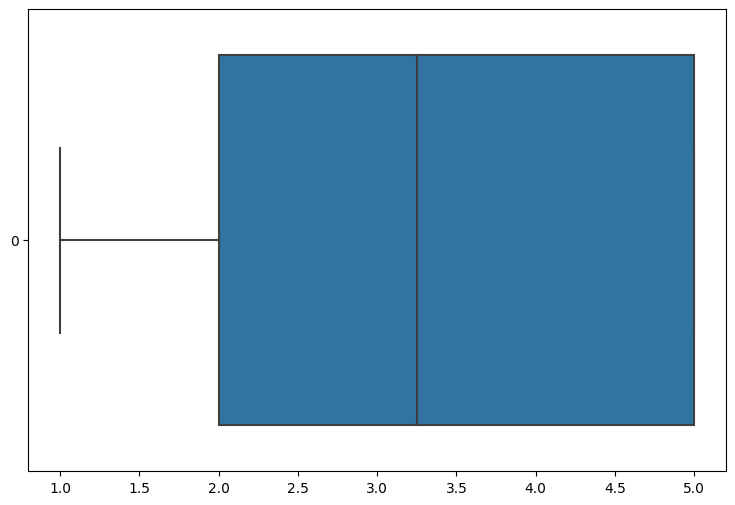

2.0


In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print("CabinStaffService Shape:",data.shape)

max_val = data.CabinStaffService.quantile(0.75)
min_val = data.CabinStaffService.quantile(0.25)

sns.boxplot(data['CabinStaffService'],orient='h')
plt.show()
print(min_val)

tidak ada ooutlier pada kolom CabinStaffService

3. Kolom GroundService

GroundService Shape: (3701, 20)


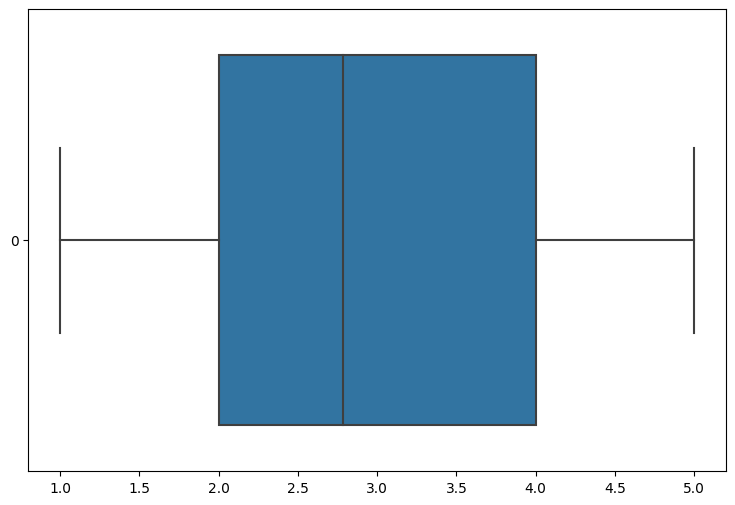

2.0


In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print("GroundService Shape:",data.shape)

max_val = data.GroundService.quantile(0.75)
min_val = data.GroundService.quantile(0.25)

sns.boxplot(data['GroundService'],orient='h')
plt.show()
print(min_val)

Tidak ada outlier pada kolom GroundService

4. Kolom ValueForMoney

ValueForMoney Shape: (3701, 20)


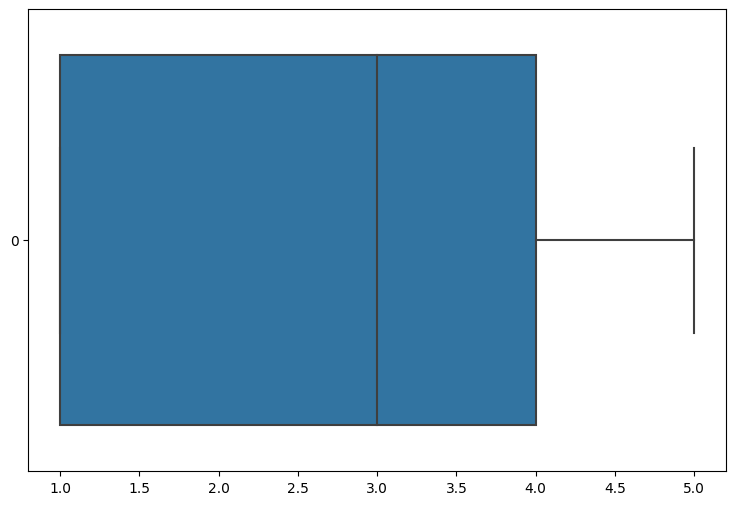

1.0


In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print("ValueForMoney Shape:",data.shape)

max_val = data.ValueForMoney.quantile(0.75)
min_val = data.ValueForMoney.quantile(0.25)

sns.boxplot(data['ValueForMoney'],orient='h')
plt.show()
print(min_val)

Tidak Ada Outlier pada Kolom Value For Money

5. Kolom Food&Beverages

Food&Beverages Shape: (3701, 20)


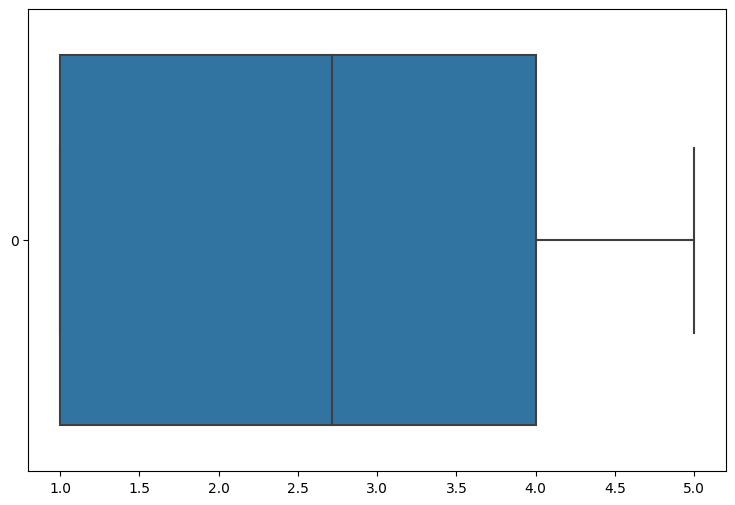

1.0


In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print("Food&Beverages Shape:",data.shape)

max_val = data['Food&Beverages'].quantile(0.75)
min_val = data['Food&Beverages'].quantile(0.25)

sns.boxplot(data['Food&Beverages'],orient='h')
plt.show()
print(min_val)

6. Kolom InflightEntertainment

InflightEntertainment Shape: (3701, 20)


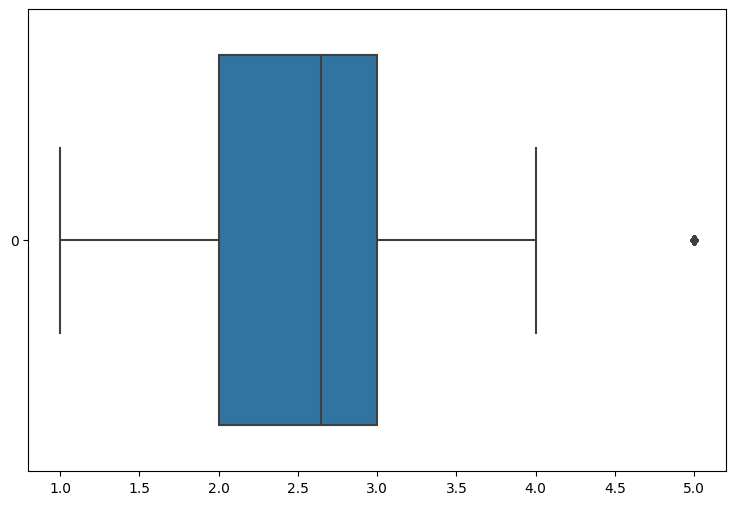

2.0


In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print("InflightEntertainment Shape:",data.shape)

max_val = data.InflightEntertainment.quantile(0.75)
min_val = data.InflightEntertainment.quantile(0.25)

sns.boxplot(data['InflightEntertainment'],orient='h')
plt.show()
print(min_val)

titik pada posisi x= 5.0 diluar plot tampak seperti outlier

In [ ]:
data['InflightEntertainment'].value_counts()

2.646021    1150
1.000000     787
3.000000     553
4.000000     467
2.000000     428
5.000000     316
Name: InflightEntertainment, dtype: int64

ketike di cek persebaran skor pada data inflightentertainment nilai 5 tidak tampak seperti outlier. hal ini mungkin dideteksi sebagai outlier oleh boxplot karena sebagian besar skor berada padad 1-4 dan bukan 5, dalam hal ini titik tersebut bukan berarti outlier / tidak harus dihapuskan

7. Kolom Wifi&Connectivity

Wifi&Connectivity Shape: (3701, 20)


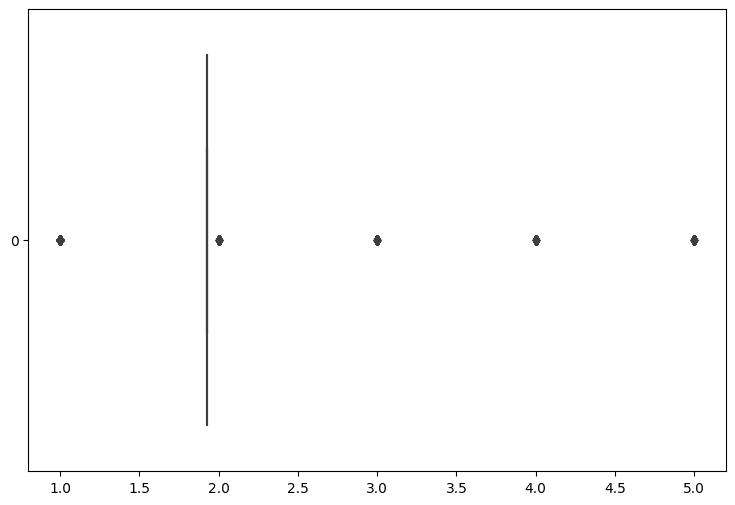

1.9244663382594418


In [ ]:
fig, axes = plt.subplots(figsize=(9, 6))

print("Wifi&Connectivity Shape:",data.shape)

max_val = data['Wifi&Connectivity'].quantile(0.75)
min_val = data['Wifi&Connectivity'].quantile(0.25)

sns.boxplot(data['Wifi&Connectivity'],orient='h')
plt.show()
print(min_val)

terdapat titik yang berada diluar kumis boxplot dan tampak seperti outlier

In [ ]:
data['Wifi&Connectivity'].value_counts()

1.924466    3092
1.000000     373
3.000000      73
2.000000      63
5.000000      54
4.000000      46
Name: Wifi&Connectivity, dtype: int64

ketika dicek persebaran nilainya rentang nilai 1-5 cukup umum sehingga titik tersebut dapat diabaikan dan tidak perlu dihapus

**Encoding**

In [ ]:
ord_enc = OrdinalEncoder(categories=[['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied', 'Delighted', 'Extremely Satisfied', 'Enthusiastic', 'Advocate', 'Evangelist']])
data['Satisfaction'] = ord_enc.fit_transform(data[['Satisfaction']])
data

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,0.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.000000,1.000000,1.000000,1.0,no,A320,2.713122,2.646021,1.924466
1,1,2.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.000000,3.000000,1.000000,2.0,no,A320,1.000000,2.000000,2.000000
2,2,7.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.000000,3.000000,4.000000,3.0,yes,A320,4.000000,2.646021,1.924466
3,3,0.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.000000,3.000000,1.000000,1.0,no,A320,2.713122,2.646021,1.924466
4,4,0.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.000000,1.000000,1.000000,1.0,no,A320,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3696,0.0,British Airways customer review,J Robertson,29th August 2012,False,This was a bmi Regional operated flight on a R...,Couple Leisure,Economy Class,London to Johannesburg,2015-08-01,3.000000,1.000000,2.784238,3.0,no,A320,2.000000,2.646021,1.924466
3697,3697,8.0,British Airways customer review,Nick Berry,28th August 2012,False,LHR to HAM. Purser addresses all club passenge...,Couple Leisure,Business Class,London to Johannesburg,2015-08-01,4.000000,5.000000,2.784238,3.0,yes,A320,4.000000,2.646021,1.924466
3698,3698,4.0,British Airways customer review,Avril Barclay,12th October 2011,False,My son who had worked for British Airways urge...,Couple Leisure,Economy Class,London to Johannesburg,2015-08-01,2.875314,3.254057,2.784238,4.0,yes,A320,2.713122,2.646021,1.924466
3699,3699,3.0,British Airways customer review,C Volz,11th October 2011,False,London City-New York JFK via Shannon on A318 b...,Couple Leisure,Premium Economy,London to Johannesburg,2015-08-01,1.000000,3.000000,2.784238,1.0,no,A320,5.000000,2.646021,1.924466


Cek Hubungan distribusi kolom DateFlown dengan Satisfaction

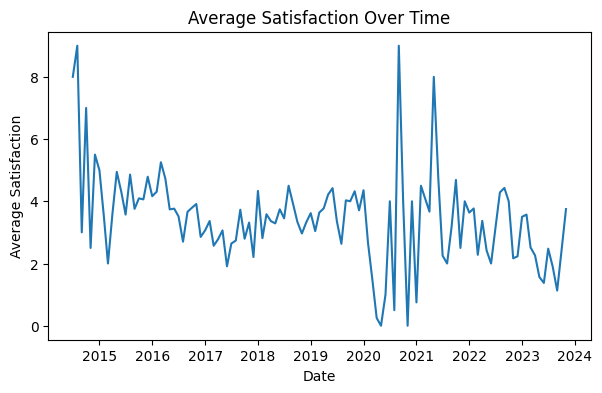

In [ ]:
data['DateFlown'] = pd.to_datetime(data['DateFlown'])

# Menghitung rata-rata Satisfaction per hari
average_satisfaction = data.groupby(data['DateFlown'].dt.date)['Satisfaction'].mean()

# Membuat plot
plt.figure(figsize=(7, 4))
plt.plot(average_satisfaction.index, average_satisfaction.values)
plt.xlabel('Date')
plt.ylabel('Average Satisfaction')
plt.title('Average Satisfaction Over Time')
plt.show()

In [ ]:
data['DateFlown']=data['DateFlown'].astype(object)

**Splitting Data**

In [ ]:
y = data['Satisfaction']
x = data.drop(columns= ['ReviewHeader','id','ReviewBody','Route','Aircraft','Name','Satisfaction','Datetime'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=42) #Konfigurasi 70% Train, 30% Testing

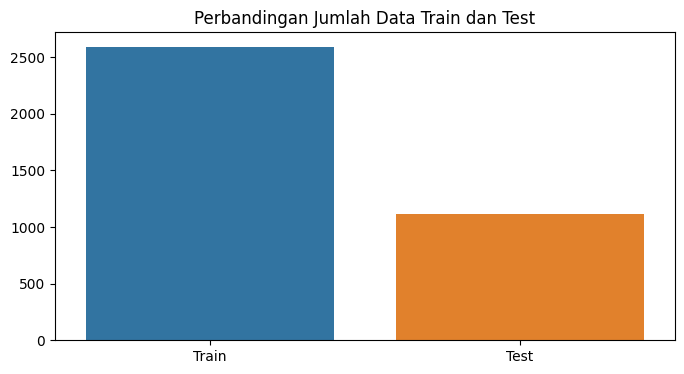

Data Train: 2590
Data Test: 1111


In [ ]:
jumlah_data = [len(x_train.index), len(x_test.index)]

plt.figure(figsize=(8, 4))
sns.barplot(x=['Train', 'Test'], y=jumlah_data)
plt.title('Perbandingan Jumlah Data Train dan Test')
plt.show()
print(f'''Data Train: {jumlah_data[0]}
Data Test: {jumlah_data[1]}''')

**Label Encoding**

In [ ]:
object_columns_tr = x_train.select_dtypes(include='object').columns.tolist()
object_columns_tr.append(x_train.select_dtypes(include='bool').columns[0])
object_columns_ts = x_test.select_dtypes(include='object').columns.tolist()
object_columns_ts.append(x_train.select_dtypes(include='bool').columns[0])

le = LabelEncoder()
for col in object_columns_tr:
  x_train[col] = le.fit_transform(x_train[col])

for col in object_columns_ts:
  x_test[col] = le.fit_transform(x_test[col])

**Scalling Data**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# Feature Engineering

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.104229,-0.020408,0.676959,-0.054507,-0.055610,-0.054258,-0.112484,-0.101940,-0.025403,0.028401,0.071529
1,0.104229,1.000000,0.106314,0.128173,0.085993,0.071416,0.105154,0.082992,0.096644,0.074654,0.080718,0.016266
2,-0.020408,0.106314,1.000000,-0.018059,0.056010,-0.046853,0.001471,-0.019134,-0.054629,-0.045004,0.029636,0.024386
3,0.676959,0.128173,-0.018059,1.000000,-0.103264,-0.094587,-0.124352,-0.204237,-0.175510,-0.102121,0.010671,0.033864
4,-0.054507,0.085993,0.056010,-0.103264,1.000000,0.587763,0.466646,0.677713,0.637341,0.579988,0.437412,0.226797
5,-0.055610,0.071416,-0.046853,-0.094587,0.587763,1.000000,0.449044,0.648776,0.652036,0.676670,0.369812,0.210999
6,-0.054258,0.105154,0.001471,-0.124352,0.466646,0.449044,1.000000,0.581667,0.547082,0.400567,0.289093,0.229413
7,-0.112484,0.082992,-0.019134,-0.204237,0.677713,0.648776,0.581667,1.000000,0.798790,0.670045,0.404735,0.211876
8,-0.101940,0.096644,-0.054629,-0.175510,0.637341,0.652036,0.547082,0.798790,1.000000,0.668247,0.401046,0.205321
9,-0.025403,0.074654,-0.045004,-0.102121,0.579988,0.676670,0.400567,0.670045,0.668247,1.000000,0.446429,0.231434


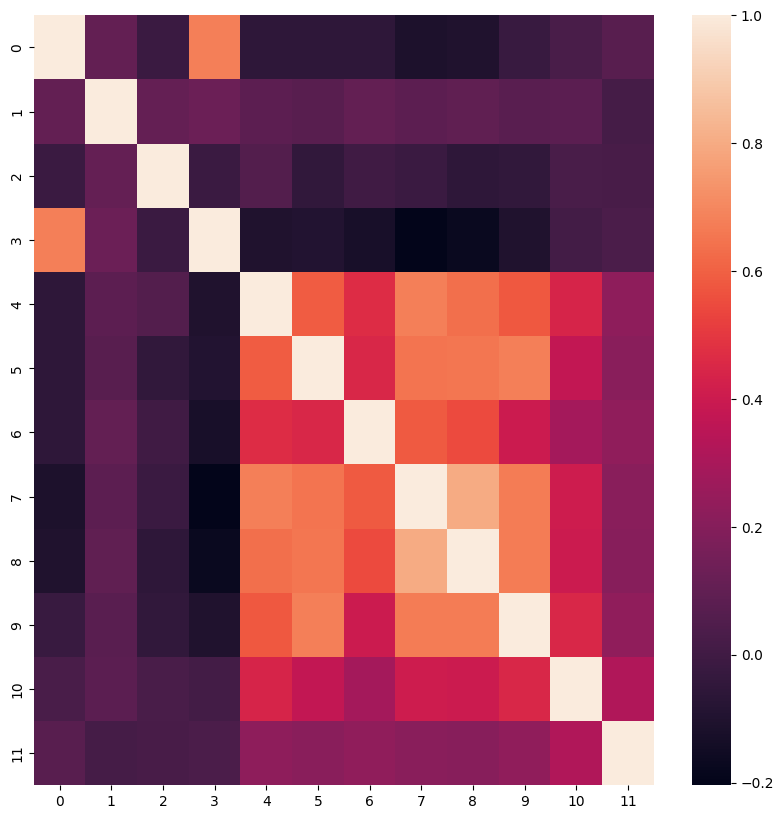

In [ ]:
correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

In [ ]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print('\nTo drop')
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)
print(x_train.head())

    0         1         2         3         4         5         6         7   \
0  NaN  0.104229 -0.020408  0.676959 -0.054507 -0.055610 -0.054258 -0.112484   
1  NaN       NaN  0.106314  0.128173  0.085993  0.071416  0.105154  0.082992   
2  NaN       NaN       NaN -0.018059  0.056010 -0.046853  0.001471 -0.019134   
3  NaN       NaN       NaN       NaN -0.103264 -0.094587 -0.124352 -0.204237   
4  NaN       NaN       NaN       NaN       NaN  0.587763  0.466646  0.677713   
5  NaN       NaN       NaN       NaN       NaN       NaN  0.449044  0.648776   
6  NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.581667   
7  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN       NaN       NaN       NaN    

<ipython-input-31-891437712728>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


**Principal Component Analysis**

mengurangi dimensi dari dataset yang besar dengan mentransformasi banyak set variabel besar ke ukuran kecil, yang masih memiliki kebanyakan informasi yang dimiliki oleh set yang besar

In [ ]:
pca = PCA(n_components=0.90)
pca.fit(x_train)
PCA_X_train = pca.transform(x_train)
PCA_X_test = pca.transform(x_test)

x_train

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.512218,1.538662,0.075016,0.232217,0.096205,-0.852159,-0.612534,-1.142442,-0.828371,-0.520205,0.001419,0.021845
1,-0.661280,-0.397749,1.217910,-0.898049,0.840053,1.197234,0.003075,1.567389,1.207189,0.961685,1.166146,0.021845
2,-0.661280,-0.397749,0.075016,-0.898049,-1.391491,-1.535291,0.003075,-1.142442,-0.828371,-1.261150,-1.414530,0.021845
3,-0.661280,-1.365955,-1.067878,-0.615482,-1.391491,-0.852159,-1.397510,-1.142442,-0.828371,-1.261150,-1.414530,0.021845
4,-0.661280,-0.397749,0.075016,-0.898049,0.096205,-0.169028,0.003075,0.889931,1.207189,0.220740,0.305920,0.021845
...,...,...,...,...,...,...,...,...,...,...,...,...
2585,1.512218,1.538662,-1.067878,0.338180,0.096205,0.514103,-1.397510,-1.142442,-0.828371,0.220740,0.001419,0.021845
2586,1.512218,-0.397749,0.075016,0.161576,0.840053,-0.169028,0.957418,0.212474,-0.828371,0.961685,0.305920,0.021845
2587,1.512218,-0.397749,0.075016,0.691388,-1.391491,-0.169028,0.957418,0.212474,-0.828371,-1.261150,-1.414530,0.021845
2588,-0.661280,-0.397749,-1.067878,-0.898049,0.096205,1.197234,0.003075,1.567389,1.207189,0.961685,1.166146,0.021845


# Experiment (TensorBoard)

Karena Label Multi kelas, ubah menjadi one-hot / setiap label adalah vektor

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Load Extension TensorBoard

In [ ]:
%reload_ext tensorboard

Inisiasi Hyperparameter dengan API

In [ ]:
from tensorboard.plugins.hparams import api as hp #Import API Hyperparameter

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16,32,64,128]))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.Discrete([0.1,0.01,0.001,0.5,0.05,0.005]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default(): #Catat Metrics ke dalam Hyper Parameter direktori logs/hparam_tuning
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_LEARNING_RATE,HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy'),hp.Metric('precision', display_name='Precision'),
             hp.Metric('recall',display_name='Recall'),hp.Metric('f1score',display_name='F1-score'),hp.Metric('mse',display_name='Mean Squared Error')],
  )

Inisiasi Model Multi Layer Perceptron ke dalam Fungsi

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
logdir = "logs/fit" #Direktori untuk hasil training model dengan data train

def train_test_model(hparams):
  models= Sequential()
  models.add(Dense(units=hparams[HP_NUM_UNITS], input_dim=PCA_X_train.shape[1], activation = 'relu')) #Hidden Layer 1
  models.add(Dense(units=128, activation = 'relu')) #Hidden Layer 2
  models.add(Dense(units=10, activation = 'softmax')) #Layer Output

  optimizer = hparams[HP_OPTIMIZER]
  learning_rate = hparams[HP_LEARNING_RATE]
  if optimizer == "adam":
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == "sgd":
    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)
  else:
    raise ValueError("unexpected optimizer name: %r" % (optimizer_name,))

  models.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=hparams[HP_LEARNING_RATE]), metrics=['accuracy',Precision(name='precision'),Recall(name='recall'),MeanSquaredError(name='mse'),F1Score(name='f1_score',average='micro')])
  models.fit(PCA_X_train, y_train, epochs=100, verbose=0, validation_split = 0.2, callbacks=[early_stopping,tf.keras.callbacks.TensorBoard(logdir),hp.KerasCallback(logdir, hparams)], batch_size=32) #Train Model

  #Reports
  _, accuracy_test,precision_test,recall_test,mse,f1score = models.evaluate(PCA_X_test, y_test, verbose=0)
  return {'accuracy':accuracy_test,'precision':precision_test,'recall':recall_test,'f1':f1score,'mse':mse}


Catat data ke Tensorboard

In [ ]:
#Catat hasil hyperparameter ke tensorboard
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy['accuracy'], step=1)
    tf.summary.scalar('Precision',accuracy['precision'],step=1)
    tf.summary.scalar('Recall',accuracy['recall'],step=1)
    tf.summary.scalar('F1-score',accuracy['f1'],step=1)
    tf.summary.scalar('Mean Squared Error',accuracy['mse'],step=1)

Looping Hyperparameter

In [ ]:
#Jalankan hyperparameter tuning
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for optimizer in HP_OPTIMIZER.domain.values:
    for learning_rate in HP_LEARNING_RATE.domain.values:
      hparams = {
            HP_NUM_UNITS: num_units,
            HP_OPTIMIZER: optimizer,
            HP_LEARNING_RATE: learning_rate,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 16, 'optimizer': 'adam', 'learning_rate': 0.001}
--- Starting trial: run-1
{'num_units': 16, 'optimizer': 'adam', 'learning_rate': 0.005}
--- Starting trial: run-2
{'num_units': 16, 'optimizer': 'adam', 'learning_rate': 0.01}
--- Starting trial: run-3
{'num_units': 16, 'optimizer': 'adam', 'learning_rate': 0.05}
--- Starting trial: run-4
{'num_units': 16, 'optimizer': 'adam', 'learning_rate': 0.1}
--- Starting trial: run-5
{'num_units': 16, 'optimizer': 'adam', 'learning_rate': 0.5}
--- Starting trial: run-6
{'num_units': 16, 'optimizer': 'sgd', 'learning_rate': 0.001}
--- Starting trial: run-7
{'num_units': 16, 'optimizer': 'sgd', 'learning_rate': 0.005}
--- Starting trial: run-8
{'num_units': 16, 'optimizer': 'sgd', 'learning_rate': 0.01}
--- Starting trial: run-9
{'num_units': 16, 'optimizer': 'sgd', 'learning_rate': 0.05}
--- Starting trial: run-10
{'num_units': 16, 'optimizer': 'sgd', 'learning_rate': 0.1}
--- Starting trial: run-11
{'num_un

Panggil Tensorboard

In [ ]:
%tensorboard --logdir logs/hparam_tuning

Reset Tensorboard

In [ ]:
# Clear any logs from previous runs
#%rm -rf ./logs/

Confussion Matrix

In [ ]:
y_prob = models.predict(PCA_X_test)
y_pred = np.argmax(y_prob, axis=1)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Experiment Result (Pandas)

Inisiasi DataFrame

In [ ]:
results_df = pd.DataFrame(columns=['Optimizer', 'HL_Size', 'Learning Rate', 'Epoch',
                                    'Mean Squared Error', 'Accuracy', 'Precision',
                                    'Recall', 'F1 Score'])

Inisiasi Model

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
def train_test_model(hparams):
  models= Sequential()
  models.add(Dense(units=hparams['num_units1'], input_dim=PCA_X_train.shape[1], activation = 'relu')) #Hidden Layer 1
  models.add(Dense(units=hparams['num_units2'], activation = 'relu')) #Hidden Layer 2
  models.add(Dense(units=10, activation = 'softmax')) #Layer Output

  optimizer = hparams['optimizer']
  learning_rate = hparams['learn_rate']
  if optimizer == "adam":
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == "sgd":
    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)
  else:
    raise ValueError("unexpected optimizer name: %r" % (optimizer_name,))

  models.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy',Precision(name='precision'),Recall(name='recall'),MeanSquaredError(name='mse'),F1Score(name='f1_score',average='micro')])
  models.fit(PCA_X_train, y_train, epochs=100, verbose=0, validation_split = 0.2, callbacks=[early_stopping], batch_size=32) #Train Model

  #Reports
  _, accuracy_test,precision_test,recall_test,mse,f1score = models.evaluate(PCA_X_test, y_test, verbose=0)
  _, accuracy_train, precision_train,recall_train,mse_train,f1_train
  return {'accuracy':accuracy_test,'precision':precision_test,'recall':recall_test,'f1':f1score,'mse':mse}


Inisiasi Hyperparameter

In [ ]:
HP_NUM_UNITS = [16,32,64,128]
HP_LEARNING_RATE = [0.1,0.01,0.001,0.5,0.05,0.005]
HP_OPTIMIZER = ['adam', 'sgd']

Looping Hyper Parameter + Catat ke DataFrame

In [ ]:
for num_units1 in HP_NUM_UNITS:
  for num_units2 in HP_NUM_UNITS:
    for learn_rate in HP_LEARNING_RATE:
      for optimizer in HP_OPTIMIZER:
        hparam = {'num_units1':num_units1,
                  'num_units2':num_units2,
                  'learn_rate':learn_rate,
                  'optimizer':optimizer}

        result = train_test_model(hparam)

        results_df = results_df.append({
        'Activation': 'relu'
        'HL_Size': [num_units1,num_units2],
        'Learning Rate': learn_rate,
        'Epoch': 100,
        'Mean Squared Error': result['mse'],
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1 Score': result['f1']
        }, ignore_index=True)


<ipython-input-37-5f16baa91e71>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-37-5f16baa91e71>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-37-5f16baa91e71>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-37-5f16baa91e71>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-37-5f16baa91e71>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

Cek Hasil DataFrame

In [ ]:
results_df

,Optimizer,HL_Size,Learning Rate,Epoch,Mean Squared Error,Accuracy,Precision,Recall,F1 Score
0,adam,"[16, 16]",0.100,100,0.069015,0.412241,0.606557,0.233123,0.412241
1,sgd,"[16, 16]",0.100,100,0.068469,0.421242,0.629310,0.197120,0.421242
2,adam,"[16, 16]",0.010,100,0.069680,0.402340,0.625954,0.221422,0.402340
3,sgd,"[16, 16]",0.010,100,0.068979,0.402340,0.675410,0.185419,0.402340
4,adam,"[16, 16]",0.001,100,0.068482,0.423042,0.632432,0.210621,0.423042
...,...,...,...,...,...,...,...,...,...
187,sgd,"[128, 128]",0.500,100,0.074384,0.383438,0.516509,0.197120,0.383438
188,adam,"[128, 128]",0.050,100,0.071964,0.363636,0.522105,0.223222,0.363636
189,sgd,"[128, 128]",0.050,100,0.070761,0.392439,0.565217,0.269127,0.392439
190,adam,"[128, 128]",0.005,100,0.075752,0.379838,0.478485,0.250225,0.379838


Export ke Excel

In [ ]:
results_df.to_excel('hasil_tensor.xlsx', index=False)

# Manual Conv

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_dataset,
      steps_per_epoch=len(train_dataset)//32,
      epochs=20,
      validation_data=val_dataset,
      verbose=2)

Epoch 1/20
1/1 - 4s - loss: 1.0987 - accuracy: 0.2500 - val_loss: 1.0978 - val_accuracy: 0.3736 - 4s/epoch - 4s/step
Epoch 2/20
1/1 - 2s - loss: 1.0941 - accuracy: 0.4062 - val_loss: 1.0906 - val_accuracy: 0.3736 - 2s/epoch - 2s/step
Epoch 3/20
1/1 - 2s - loss: 1.0987 - accuracy: 0.3438 - val_loss: 1.0909 - val_accuracy: 0.3648 - 2s/epoch - 2s/step
Epoch 4/20
1/1 - 3s - loss: 1.0930 - accuracy: 0.4062 - val_loss: 1.0871 - val_accuracy: 0.3648 - 3s/epoch - 3s/step
Epoch 5/20
1/1 - 4s - loss: 1.0894 - accuracy: 0.3750 - val_loss: 1.0846 - val_accuracy: 0.3648 - 4s/epoch - 4s/step
Epoch 6/20
1/1 - 2s - loss: 1.1002 - accuracy: 0.2500 - val_loss: 1.0906 - val_accuracy: 0.3736 - 2s/epoch - 2s/step
Epoch 7/20
1/1 - 2s - loss: 1.0917 - accuracy: 0.3750 - val_loss: 1.0855 - val_accuracy: 0.3736 - 2s/epoch - 2s/step
Epoch 8/20
1/1 - 2s - loss: 1.1004 - accuracy: 0.3438 - val_loss: 1.0938 - val_accuracy: 0.3736 - 2s/epoch - 2s/step
Epoch 9/20
1/1 - 3s - loss: 1.0865 - accuracy: 0.4375 - val_loss

In [ ]:
model.evaluate(test_dataset)
preds = model.predict(test_dataset)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(test_dataset.labels)

18/18 [==============================] - 2s 112ms/step


In [ ]:
print(classification_report(y_test, y_preds))